In [14]:
from scipy.stats import chisquare

observed_values = [107, 38, 45, 10]
expected_values = [200*9/16, 200*3/16, 200*3/16, 200*1/16]  # 9:3:3:1의 비율

chi2,p_value = chisquare(observed_values, f_exp=expected_values)

print(f"카이제곱 통계량: {chi2:.3}")
print(f"p-value: {p_value:.3}")

if p_value < 0.05:
    print("귀무가설을 기각합니다. 주어진 자료의 분포는 9:3:3:1 비율과 다릅니다.")
else:
    print("귀무가설을 기각하지 않습니다. 주어진 자료의 분포는 9:3:3:1 비율과 일치합니다.")


카이제곱 통계량: 2.28
p-value: 0.517
귀무가설을 기각하지 않습니다. 주어진 자료의 분포는 9:3:3:1 비율과 일치합니다.


Kolmogorov-Smirnov 통계량: 0.1873
P-value: 0.4623
귀무가설을 기각하지 않습니다. 데이터는 정규분포를 따를 가능성이 있습니다.


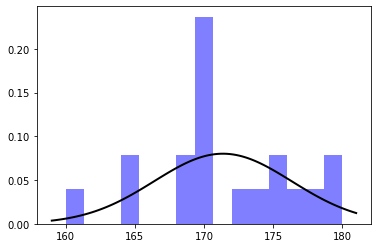

In [34]:
import numpy as np
from scipy.stats import kstest, norm
import matplotlib.pyplot as plt
import pyreadstat
import urllib.request

# url에 있는 파일을 로컬 컴퓨터에 다운로드 한다.
url = 'https://hmkang98.github.io/spss/bar/bmi2.sav'
local_path='c:/data/bmi2.sav'
urllib.request.urlretrieve(url,local_path)

# spss 파일을 읽는다.
bmi, meta = pyreadstat.read_sav(local_path)

# 성별에 따른 키 데이터 추출
height = bmi.키
mheight = bmi[bmi.성별==2].키
fheight = bmi[bmi.성별==1].키

# 히스토그램 그리기
plt.hist(mheight, bins=15, density=True, alpha=0.5, color='blue')

# 이론적 정규분포의 확률밀도함수 그리기
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(mheight), np.std(mheight))
plt.plot(x, p, 'k', linewidth=2)

# Kolmogorov-Smirnov 검정 수행
ks_statistic, ks_p_value = kstest(mheight, 'norm', (np.mean(mheight), np.std(mheight)),'asymp')

# Shapiro-Wilk 검정 수행
shapiro_statistic, shapiro_p_value = shapiro(mheight)

# 결과 출력
print(f"Kolmogorov-Smirnov 통계량: {ks_statistic:.4}")
print(f"P-value: {ks_p_value:.4}")

# 검정 결과를 통해 정규분포를 따르는지 확인
if ks_p_value > 0.05:
    print("귀무가설을 기각하지 않습니다. 데이터는 정규분포를 따를 가능성이 있습니다.")
else:
    print("귀무가설을 기각합니다. 데이터는 정규분포를 따르지 않을 가능성이 있습니다.")

In [36]:
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import pyreadstat
import urllib.request

# url에 있는 파일을 로컬 컴퓨터에 다운로드 한다.
url = 'https://hmkang98.github.io/spss/bar/bmi2.sav'
local_path='c:/data/bmi2.sav'
urllib.request.urlretrieve(url,local_path)

# spss 파일을 읽는다.
bmi, meta = pyreadstat.read_sav(local_path)

# 성별에 따른 키 데이터 추출
height = bmi.키
mheight = bmi[bmi.성별==2].키
fheight = bmi[bmi.성별==1].키

# Shapiro-Wilk 검정 수행
shapiro_statistic, shapiro_p_value = shapiro(mheight)

# 결과 출력
print(f"Shapiro-Wilk 통계량: {shapiro_statistic:.4}")
print(f"P-value: {shapiro_p_value:.4}")

# 검정 결과를 통해 정규분포를 따르는지 확인
if shapiro_p_value > 0.05:
    print("귀무가설을 기각하지 않습니다. 데이터는 정규분포를 따를 가능성이 있습니다.")
else:
    print("귀무가설을 기각합니다. 데이터는 정규분포를 따르지 않을 가능성이 있습니다.")

Shapiro-Wilk 통계량: 0.9581
P-value: 0.5354
귀무가설을 기각하지 않습니다. 데이터는 정규분포를 따를 가능성이 있습니다.


In [60]:
from scipy.stats.contingency import odds_ratio, relative_risk

# 승산비와 승산비에 대한 95% 신뢰구간
oddsratio = odds_ratio([[172,173],[90,346]],kind='sample')
print(f'승산비 : {oddsratio.statistic:.4}')
print(f'승산비에 대한 95% 신뢰구간 :  {oddsratio.confidence_interval(confidence_level=0.95)}')

#심근경색인 경우 상대위험도와 95% 신뢰구간
rr = relative_risk(172,345,90,436) # (n_11,n_11+n_12,n_21,n_21+n_22)
print(f'심근경색인 경우 상대위험도 : {rr.relative_risk:.4}')
print(f'심근경색인 경우 상대위험도에 대한 95% 신뢰구간 : {rr.confidence_interval(confidence_level=0.95)}')

# 대조군인 경우 상대위험도와 95% 신뢰구간
rr2 = relative_risk(173,345,346,436) # (n_12,n_11+n_12,n_22,n_21+n_22)
print(f'대조군인 경우 상대위험도 : {rr2.relative_risk:.4}')
print(f'대조군인 경우 상대위험도에 대한 95% 신뢰구간 : {rr2.confidence_interval(confidence_level=0.95)}')

승산비 : 3.822
승산비에 대한 95% 신뢰구간 :  ConfidenceInterval(low=2.793414808434619, high=5.229936732610159)
심근경생인 경우 상대위험도 : 2.415
심근경생인 경우 상대위험도에 대한 95% 신뢰구간 : ConfidenceInterval(low=1.9532251434358545, high=2.9864438732742262)
대조군인 경우 상대위험도 : 0.6319
대조군인 경우 상대위험도에 대한 95% 신뢰구간 : ConfidenceInterval(low=0.562905286623256, high=0.7093155317710612)


In [68]:
from scipy.stats import chi2_contingency
import pandas as pd

# 자료 입력
data = pd.DataFrame([[10,17,7],[23,12,5]],columns=['2주 이하','4주 이하','5주 이상'],index=['착용','미착용'])

# Pearson 카이제곱 통계량
statistic,p_value,df,expected = chi2_contingency(data)
print(f'Pearson chi2 statistic : {statistic:.4}')
print(f'p_value : {p_value:.4}')

# likelihood ratio chi-square test: G-test
statistic,p_value,df,expected = chi2_contingency(data,lambda_='log-likelihood')
print(f'G-square statistic : {statistic:.4}')
print(f'p_value : {p_value:.4}')

Pearson chi2 statistic : 5.869
p_value : 0.05317
G-square statistic : 5.977
p_value : 0.05037


In [70]:
from scipy.stats import fisher_exact
import pandas as pd

# 자료 입력
data = pd.DataFrame([[3,1],[1,3]],columns=['우유','홍차'],index=['우유','홍차'])

# Pearson 카이제곱 통계량
statistic,p_value = fisher_exact(data,alternative='greater')
print(f'p_value : {p_value:.4}')

p_value : 0.2429


In [90]:
from statsmodels.stats.contingency_tables import mcnemar
import pandas as pd

# 자료 입력
data = pd.DataFrame([[500,450],[400,450]],columns=['찬성','반대'],index=['찬성','반대'])

# Pearson 카이제곱 통계량, correction=True는 연속성 수정
mc = mcnemar(data,exact=False,correction=True)
print(f'{mc.pvalue:.2}')
print(f'{mc.statistic:.3}')

0.093
2.82


In [110]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
data = sm.datasets.china_smoking.load_pandas()
mat = np.asarray(data.data)
tables = [np.reshape(x.tolist(), (2, 2)) for x in mat]
st = sm.stats.StratifiedTable(tables)
print(st.summary())
print(data.data)
print(data.title)
print(data.raw_data)

                   Estimate   LCB    UCB 
-----------------------------------------
Pooled odds           2.174   1.984 2.383
Pooled log odds       0.777   0.685 0.868
Pooled risk ratio     1.519              
                                         
                 Statistic P-value 
-----------------------------------
Test of OR=1       280.138   0.000 
Test constant OR     5.200   0.636 
                       
-----------------------
Number of tables    8  
Min n             213  
Max n            2900  
Avg n            1052  
Total n          8419  
-----------------------
           smoking_yes_cancer_yes  smoking_yes_cancer_no  \
Location                                                   
Beijing                       126                    100   
Shanghai                      908                    688   
Shenyang                      913                    747   
Nanjng                        235                    172   
Harbin                        402                   

In [127]:
# raw data를 리스트로 입력
data=[[512,353,120,138,53,224],[313,207,205,279,138,149],[89,17,202,131,94,239],[19,8,391,244,299,102]]
rlabel = ['male_admit','male_reject','female_admit','female_reject']
clabel = ['A','B','C','D','E','F']
data = pd.DataFrame(data,index=rlabel,columns=clabel)

# 데이터프레임을 array로 변환
mat = np.asarray(data)

# 열 갯수가 4개 되도록 행렬을 전치
mat = mat.T

# 2 x 2 x 6 행렬로 변환 
tables = [np.reshape(x.tolist(), (2, 2)) for x in mat]

# CHM 검정실행 
st = sm.stats.StratifiedTable(tables)
print(st.summary())


                   Estimate   LCB    UCB  
------------------------------------------
Pooled odds           0.843   0.729  0.975
Pooled log odds      -0.170  -0.316 -0.025
Pooled risk ratio     0.920               
                                          
                 Statistic P-value 
-----------------------------------
Test of OR=1         5.274   0.022 
Test constant OR    22.866   0.000 
                       
-----------------------
Number of tables    6  
Min n             584  
Max n             933  
Avg n             754  
Total n          4526  
-----------------------


In [130]:
tables

[array([[512, 313],
        [ 89,  19]]),
 array([[353, 207],
        [ 17,   8]]),
 array([[120, 205],
        [202, 391]]),
 array([[138, 279],
        [131, 244]]),
 array([[ 53, 138],
        [ 94, 299]]),
 array([[224, 149],
        [239, 102]])]